In [1]:
!pip install openpyxl
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     |████████████████████████████████| 242 kB 889 kB/s 
/kaggle/input/cancer-patients-data/cancer patient data sets.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/cancer-patients-data/cancer patient data sets.xlsx',header = None)

In [3]:
# Grab the first row for the header
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [4]:
lv = {'Low': 1,'Medium': 2, 'High': 3}
df['Severity'] = [lv[item] for item in df['Level']]
df.drop(columns="Level",inplace=True)

In [5]:
# Split dataset as train and test data
split_index = int(0.8 * len(df))
train_data, test_data = df[:split_index], df[split_index:]

In [6]:
train_data.head()

0 Patient Id Age Gender Air Pollution Alcohol use Dust Allergy  \
1         P1  33      1             2           4            5   
2        P10  17      1             3           1            5   
3       P100  35      1             4           5            6   
4      P1000  37      1             7           7            7   
5       P101  46      1             6           8            7   

0 OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  ...  \
1                    4            3                    2             2  ...   
2                    3            4                    2             2  ...   
3                    5            5                    4             6  ...   
4                    7            6                    7             7  ...   
5                    7            7                    6             7  ...   

0 Fatigue Weight Loss Shortness of Breath Wheezing Swallowing Difficulty  \
1       3           4                   2        2                     3   
2       1           3                   7        8                     6   
3       8           7                   9        2                     1   
4       4           2                   3        1                     4   
5       3           2                   4        1                     4   

0 Clubbing of Finger Nails Frequent Cold Dry Cough Snoring Severity  
1                        1             2         3       4        1  
2                        2             1         7       2        2  
3                        4             6         7       2        3  
4                        5             6         7       5        3  
5                        2             4         2       3        3  

[5 rows x 25 columns]

In [7]:
test_data.head()

0   Patient Id Age Gender Air Pollution Alcohol use Dust Allergy  \
801       P819  29      2             6           7            7   
802        P82  26      1             6           7            7   
803       P820  65      1             6           8            7   
804       P821  38      2             2           1            5   
805       P822  19      1             3           2            4   

0   OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  ...  \
801                    7            7                    6             7  ...   
802                    7            6                    7             7  ...   
803                    7            7                    6             2  ...   
804                    3            2                    3             2  ...   
805                    2            3                    2             3  ...   

0   Fatigue Weight Loss Shortness of Breath Wheezing Swallowing Difficulty  \
801       2           7                   6        7                     6   
802       4           2                   3        1                     4   
803       2           7                   6        5                     1   
804       6           7                   2        5                     8   
805       4           5                   6        5                     5   

0   Clubbing of Finger Nails Frequent Cold Dry Cough Snoring Severity  
801                        7             2         3       1        3  
802                        5             6         7       5        3  
803                        9             3         4       2        2  
804                        1             3         2       3        2  
805                        4             6         5       4        2  

[5 rows x 25 columns]

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 1 to 800
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                800 non-null    object
 1   Age                       800 non-null    object
 2   Gender                    800 non-null    object
 3   Air Pollution             800 non-null    object
 4   Alcohol use               800 non-null    object
 5   Dust Allergy              800 non-null    object
 6   OccuPational Hazards      800 non-null    object
 7   Genetic Risk              800 non-null    object
 8   chronic Lung Disease      800 non-null    object
 9   Balanced Diet             800 non-null    object
 10  Obesity                   800 non-null    object
 11  Smoking                   800 non-null    object
 12  Passive Smoker            800 non-null    object
 13  Chest Pain                800 non-null    object
 14  Coughing of Blood         

In [9]:
X_train = train_data.drop(columns='Severity')
Y_train = train_data['Severity'].astype(int)
X_test = test_data.drop(columns='Severity')
Y_test = test_data['Severity'].astype(int)

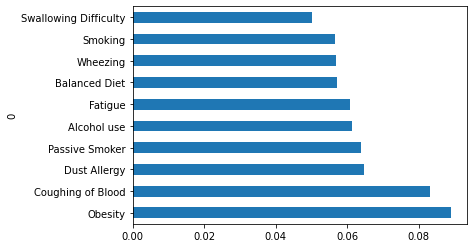

In [10]:
# Feature selectio
model = ExtraTreesClassifier()
model.fit(X_train.drop(columns='Patient Id'),Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[1:])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
# Drop columns that will not be used to train our model
X_train.drop(columns=['Age','Gender','Air Pollution','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Chest Pain','Weight Loss','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'], inplace=True)
X_test.drop(columns=['Age','Gender','Air Pollution','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Chest Pain','Weight Loss','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'], inplace=True) 
X_train.head()

0 Patient Id Alcohol use Balanced Diet Obesity Smoking Passive Smoker  \
1         P1           4             2       4       3              2   
2        P10           1             2       2       2              4   
3       P100           5             6       7       2              3   
4      P1000           7             7       7       7              7   
5       P101           8             7       7       8              7   

0 Coughing of Blood Fatigue Shortness of Breath Wheezing Swallowing Difficulty  
1                 4       3                   2        2                     3  
2                 3       1                   7        8                     6  
3                 8       8                   9        2                     1  
4                 8       4                   3        1                     4  
5                 9       3                   4        1                     4

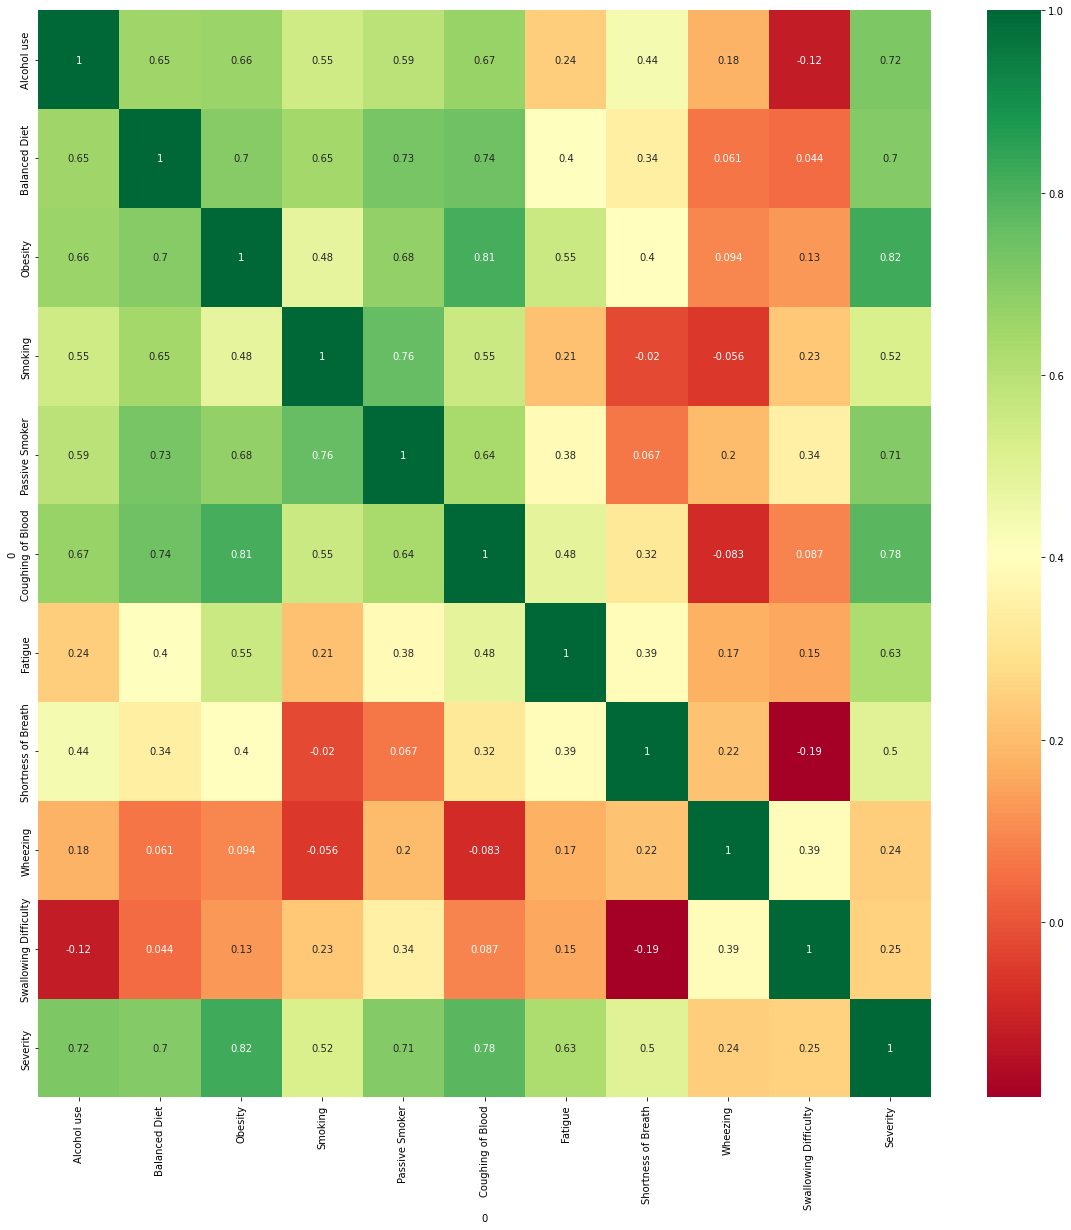

In [12]:
features = train_data.drop(columns=['Patient Id','Age','Gender','Air Pollution','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Chest Pain','Weight Loss','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'])
corrmat = features.astype(int).corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(features[top_corr_features].astype(int).corr(),annot=True,cmap="RdYlGn")

In [13]:
vif_data = pd.DataFrame()
variables = X_train.drop(columns=['Patient Id','Obesity','Balanced Diet','Passive Smoker','Coughing of Blood']).astype(int)
vif_data["feature"] = variables.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(len(variables.columns))]
  
print(vif_data)

                 feature       VIF
0            Alcohol use  9.434111
1                Smoking  6.966625
2                Fatigue  5.105997
3    Shortness of Breath  6.442090
4               Wheezing  6.397128
5  Swallowing Difficulty  5.634356


In [14]:
# Train the Support Vector Machine model
model = SVC()
model.fit(variables, Y_train)
 
# Prediction results
predictions = model.predict(X_test.drop(columns=['Patient Id','Obesity','Balanced Diet','Passive Smoker','Coughing of Blood']))
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        60
           2       0.97      1.00      0.98        63
           3       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

